## Data Loading

In [93]:
# Importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Define path to raw data files
current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, "..", "data", "raw"))

In [50]:
# List files in the data directory
files = os.listdir(data_path)

In [51]:
# Create a dictionary where each key is a file name and the value is a DataFrame with the data.
custom_names = {
    "olist_customers_dataset.csv": "customer",
    "olist_geolocation_dataset.csv": "geolocation",
    "olist_order_items_dataset.csv": "order_items",
    "olist_order_payments_dataset.csv": "payments",
    "olist_orders_dataset.csv": "orders",
    "olist_products_dataset.csv": "products",
    "olist_sellers_dataset.csv": "sellers"
}

dfs = {
    custom_names[file]: pd.read_csv(os.path.join(data_path, file))
    for file in files if file in custom_names
}

In [52]:
# Display information about each loaded dataset.
for file, df in dfs.items():
    print(f"\nDataset: {file}")
    print(df.shape)
    print(df.head())


Dataset: customer
(99441, 5)
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Dataset: geolocation
(1000163, 5)
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                   

## Orders Dataframe: treatment and Type Conversion

In [53]:
orders = dfs["orders"]  # Extract the 'orders' DataFrame

In [54]:
pd.set_option("display.max_columns", None)
print(orders.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

#### Null and Missing values treatment

In [55]:
# Identifying null or missing values.
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


There are null numerical values in the order approval date column, indicating that the orders were not approved. The shipping date column also contains null values, indicating that the order was not shipped. Lastly, the delivery date column also contains null values, indicating that the order was not delivered. However, the data will be kept as is, since the column type will be changed to datetime and the null values will become NaT (Not a Time). This maintains data consistency and avoids issues with operations involving dates.

In [56]:
# Checking column data types
print(orders.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


#### Columns type conversion


Converting date columns from object to datetime

In [57]:

date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

In [58]:
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors="coerce")

Converting "order status" column from object to category

In [59]:
orders["order_status"] = orders["order_status"].astype("category")

In [60]:
# Checking if the type conversion was succeessful
print(orders.dtypes)

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


## Orders Items Dataframe: treatment and Type Conversion

In [61]:
order_items = dfs["order_items"]  # Extract the 'order_items' DataFrame

In [62]:
pd.set_option("display.max_columns", None)
print(order_items.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

#### Null and Missing values treatment

In [63]:
# Identifying null or missing values.
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [64]:
# Checking column data types
print(order_items.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Converting date columns from object to datetime

In [65]:
order_items["shipping_limit_date"] = pd.to_datetime(
    order_items["shipping_limit_date"], errors="coerce")

In [66]:
# Checking if the type conversion was succeessful
print(order_items.dtypes)

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


## Customers Dataframe: treatment and Type Conversion

In [67]:
customer = dfs["customer"]  # Extract the 'customers' DataFrame

In [68]:
pd.set_option("display.max_columns", None)
print(customer.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


#### Null and Missing values treatment

In [69]:
# Identifying null or missing values.
print(customer.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [70]:
# Checking column data types
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Products Dataframe: treatment and Type Conversion

In [71]:
products = dfs["products"]  # Extract the 'products' DataFrame

In [72]:
pd.set_option("display.max_columns", None)
print(products.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

#### Null and Missing values treatment

In [73]:
# Identifying null or missing values.
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Null values were found in the product category name, which will be filled with "Unknown". Null values were also found in the columns: product name length, description length, and number of photos. These will be filled with the median to avoid distortions caused by extreme values. Finally, two null values were found in the columns: weight, length, height, and width. All of these will also be filled with the median.

In [74]:
# Null and missing values treatment.
products["product_category_name"].fillna("Unknown", inplace=True)
num_cols = [
    "product_name_lenght", "product_description_lenght",
    "product_photos_qty", "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]
for col in num_cols:
    products[col].fillna(products[col].median(), inplace=True)

In [75]:
# Checking if the null and missing values were treated.
print(products.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


#### Columns type conversion

In [76]:
# Checking column data types
# Check data_preparation.ipynb notebook for treatment details.
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Sellers Dataframe: treatment and Type Conversion

In [77]:
sellers = dfs["sellers"]  # Extract the 'sellers' DataFrame

In [78]:
pd.set_option("display.max_columns", None)
print(sellers.head())

                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  


#### Null and Missing values treatment

In [79]:
# Identifying null or missing values.
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [80]:
# Checking column data types
print(sellers.dtypes)

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


The column data types are correct.

## Payments Dataframe: treatment and Type Conversion

In [81]:
payments = dfs["payments"]  # Extract the 'payments' DataFrame

In [82]:
pd.set_option("display.max_columns", None)
print(payments.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


#### Null and Missing values treatment

In [83]:
# Identifying null or missing values.
print(payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [84]:
# Checking column data types
print(payments.dtypes)

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


Converting 'payment_type' column from object to category.

In [85]:
payments["payment_type"] = payments["payment_type"].astype("category")

In [86]:
# Checking if the type conversion was succeessful
print(payments["payment_type"].dtypes)

category


## Geolocation: treatment and Type Conversion

In [87]:
geolocation = dfs["geolocation"]  # Extract the 'geolocation' DataFrame

In [88]:
pd.set_option("display.max_columns", None)
print(geolocation.head())

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


#### Null and Missing values treatment

In [89]:
# Identifying null or missing values.
print(geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [90]:
# Checking column data types
print(geolocation.dtypes)

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


The column data types are correct.

## Saving the processed Dataframes

In [91]:
# Saving the processed Dataframes in the "../data/processed".
processed_path = os.path.abspath(
    os.path.join(current_dir, "..", "data", "processed"))

In [92]:
for file, df in dfs.items():
    file_name = f"{file}.csv"
    df.to_csv(os.path.join(processed_path, file_name), index=False)
    print(f"Processed dataset '{file_name}' saved to {processed_path}")


Processed dataset 'customer.csv' saved to c:\Users\ricka\Desktop\Area de Trabalho\Projeto de Estudo Machine Learning\Projetos e Estudos Git - Machine Learning\Portifolio\Ecommerce_Analysis\data\processed
Processed dataset 'geolocation.csv' saved to c:\Users\ricka\Desktop\Area de Trabalho\Projeto de Estudo Machine Learning\Projetos e Estudos Git - Machine Learning\Portifolio\Ecommerce_Analysis\data\processed
Processed dataset 'orders.csv' saved to c:\Users\ricka\Desktop\Area de Trabalho\Projeto de Estudo Machine Learning\Projetos e Estudos Git - Machine Learning\Portifolio\Ecommerce_Analysis\data\processed
Processed dataset 'order_items.csv' saved to c:\Users\ricka\Desktop\Area de Trabalho\Projeto de Estudo Machine Learning\Projetos e Estudos Git - Machine Learning\Portifolio\Ecommerce_Analysis\data\processed
Processed dataset 'payments.csv' saved to c:\Users\ricka\Desktop\Area de Trabalho\Projeto de Estudo Machine Learning\Projetos e Estudos Git - Machine Learning\Portifolio\Ecommerce_

# Exploratory Data Analysis

In this section, we explore the dataset to gain insights into customer behavior, order patterns and the overall performance of a Brazilian e-commerce marketplace. Through visualizations and descriptive statistics, we aim to build a solid understanding of the dataset before moving on to more advanced analytics or machine learning steps.

## Orders counts by status

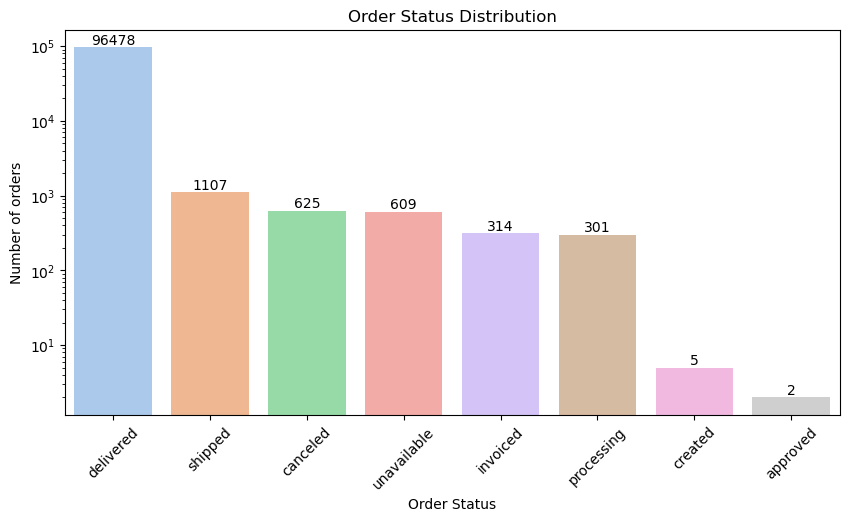

In [97]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=orders, x ="order_status", order=orders["order_status"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of orders")
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )
plt.show()



Most orders were successfully delivered, suggesting that the delivery system is performing efficiently.

## Orders over time

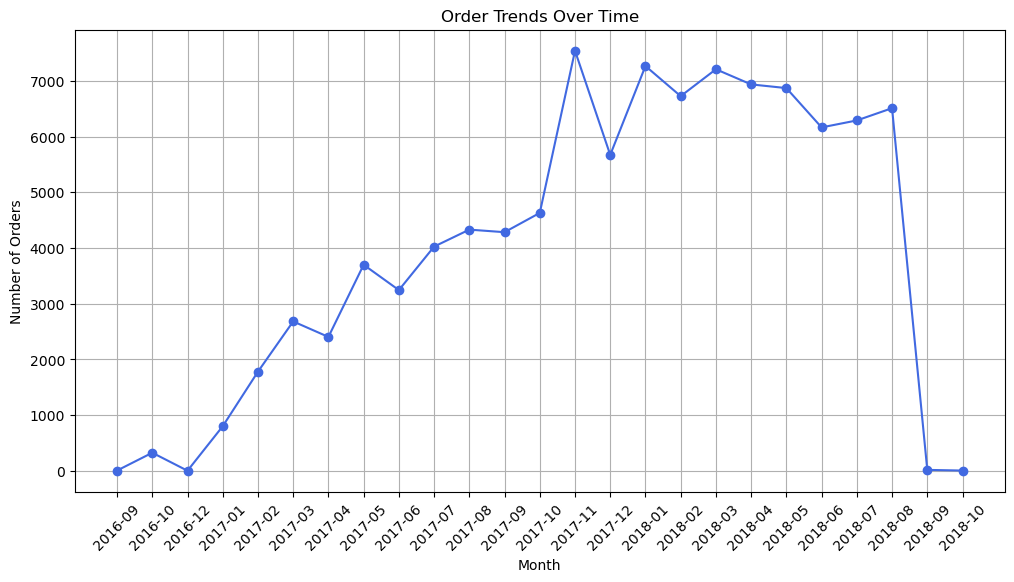

In [99]:
orders["order_purchase_month"] = orders["order_purchase_timestamp"].dt.to_period(
    "M")
monthly_orders = orders.groupby("order_purchase_month")["order_id"].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(
    str), monthly_orders.values, marker='o', linestyle="-", color="royalblue")
plt.title("Order Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There was a growth trend in the number of orders from December 2016 to November 2017, 
followed by a stabilization period from December 2017 to August 2018. However, there was 
a sharp drop in orders from August to October. It's important to check whether there is 
data available for the final months or if the dataset simply ends there.

In [100]:
# Checking if data exists for the last months
print(monthly_orders.tail(10))  # Last 10 months available

order_purchase_month
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64


There were orders in the last months, but the quantity is well below normal, indicating that the dataset is likely incomplete for the final months.

## Delivery Time Analysis

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64


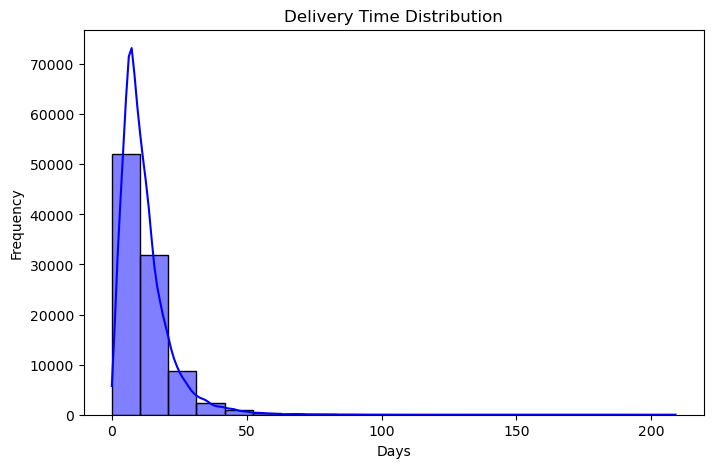

In [101]:
# Creating a delivery time column in days
orders["delivery_time"] = (
    orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]
).dt.days

# Delivery time analysis
print(orders["delivery_time"].describe())

plt.figure(figsize=(8, 5))
sns.histplot(orders["delivery_time"].dropna(), bins=20, kde=True, color="blue")
plt.title("Delivery Time Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

The chart shows that delivery times are concentrated between 10 and 20 days.
It is important to analyze whether the average delivery time increased in recent months,

## Average Delivery Time Over Months

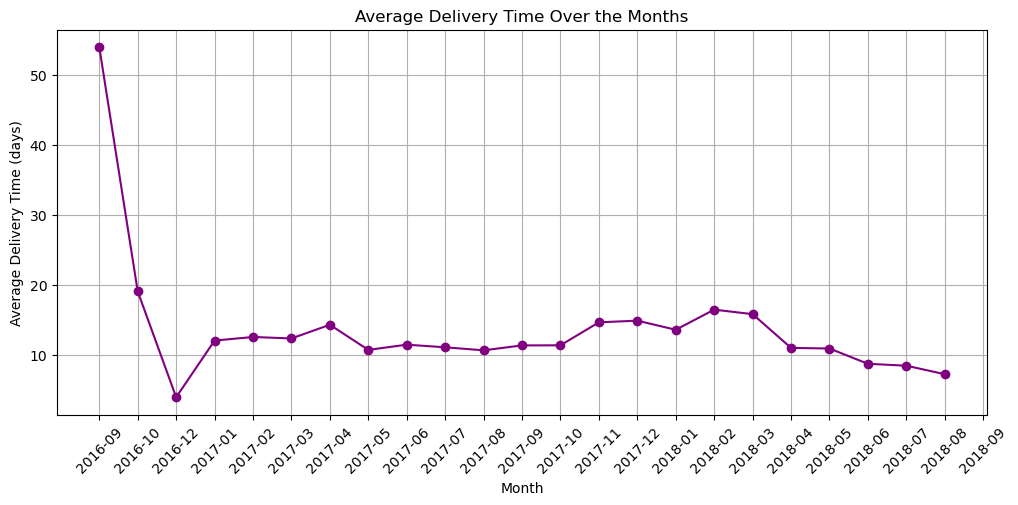

In [102]:
orders["order_purchase_month"] = orders["order_purchase_timestamp"].dt.to_period("M")

monthly_delivery_time = orders.groupby("order_purchase_month")["delivery_time"].mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_delivery_time.index.astype(str), monthly_delivery_time.values,
         marker='o', linestyle="-", color="purple")
plt.xticks(rotation=45)
plt.title("Average Delivery Time Over the Months")
plt.xlabel("Month")
plt.ylabel("Average Delivery Time (days)")
plt.grid(True)
plt.show()

The average delivery time was high at first but dropped significantly after the third month.
It remained relatively stable in the following months, with a slight decrease in the last three.
Therefore, the drop in order volume cannot be attributed to delivery delays.

## Checking order cancellations over time

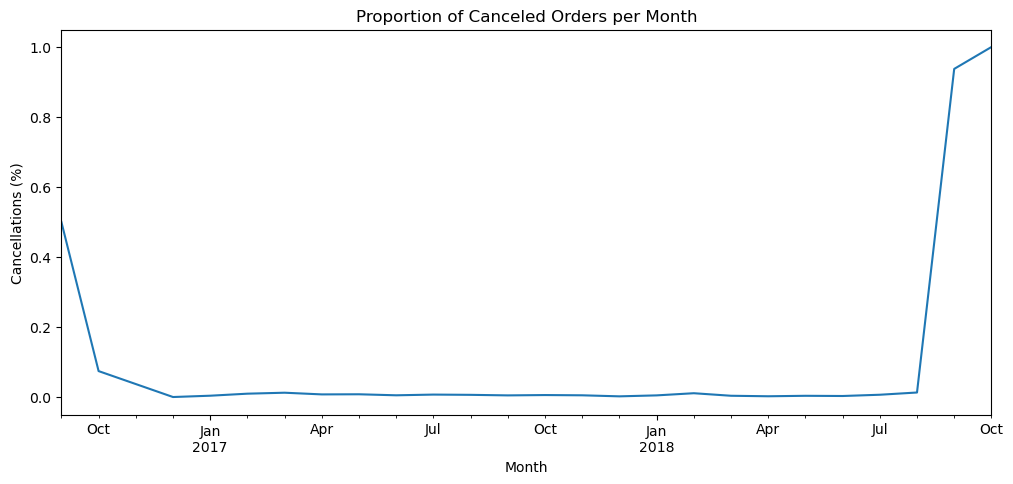

In [103]:
orders.groupby("order_purchase_month")["order_status"].value_counts(normalize=True).unstack()["canceled"].plot(
    kind="line", figsize=(12, 5))
plt.title("Proportion of Canceled Orders per Month")
plt.xlabel("Month")
plt.ylabel("Cancellations (%)")
plt.show()

The graph shows that the proportion of canceled orders rose to around 100% in the last few months.

The charts indicate that there is a normal pattern in the data, except for the months starting from August. The likely reason is that the data from August onward is incomplete, with only cancellations being imported. Therefore, the chosen approach to prevent this discrepancy in order volume from affecting further analyses and models will be remove the rows related to those months.